In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings


In [2]:
import dtale as dt 
warnings.filterwarnings('ignore', category=FutureWarning) 

In [3]:
df = pd.read_csv('/home/m2khoda/vigasa/Video-Game-Sales-Prediction/data/raw/vgsalesGlobale.csv')


In [4]:
df.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [7]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      shape=(11493,), dtype=object)

In [5]:
df.shape

(16598, 11)

In [10]:
df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].head()

,Name,Platform,Year,Genre,Publisher
0,Wii Sports,Wii,2006.0,Sports,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [6]:
duplicate_value = df.duplicated().sum() 
print(f"Number of Duplicate Value: {duplicate_value}") 

Number of Duplicate Value: 0


In [7]:
print('Missing values in each column:') 
missing_values = df.isnull().sum() 
print(missing_values) 

Missing values in each column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
df[df['Year'].isnull() | df['Publisher'].isnull()] 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [9]:
df[df['Year'].isna() & df['Publisher'].isna()].count()

Rank            22
Name            22
Platform        22
Year             0
Genre           22
Publisher        0
NA_Sales        22
EU_Sales        22
JP_Sales        22
Other_Sales     22
Global_Sales    22
dtype: int64

In [10]:
df.dropna(subset=['Year', 'Publisher'], inplace=True) 
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df['Year'] = df['Year'].astype(int)

Starting with the Data Analysis

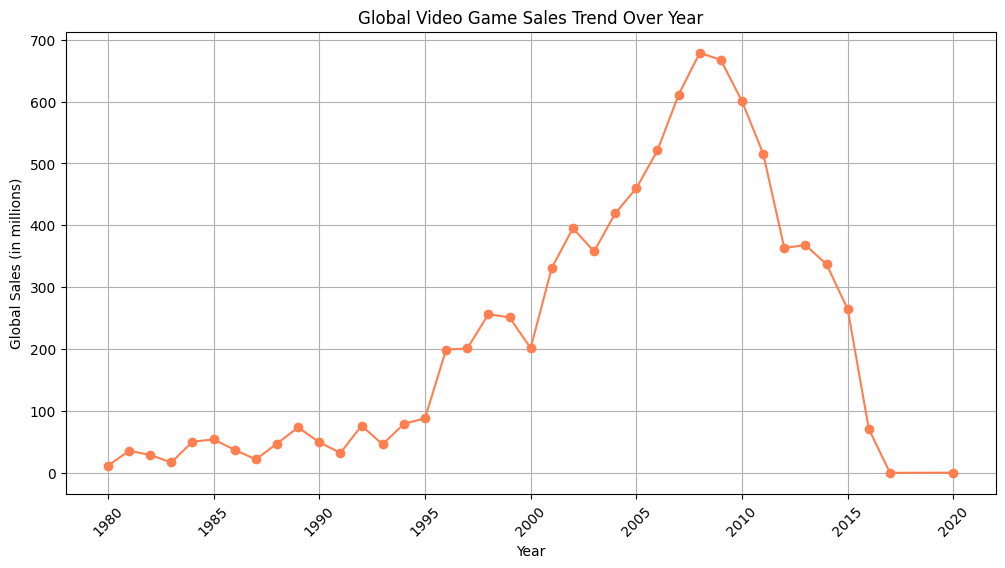

In [5]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(marker='o', color='coral')
plt.title('Global Video Game Sales Trend Over Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

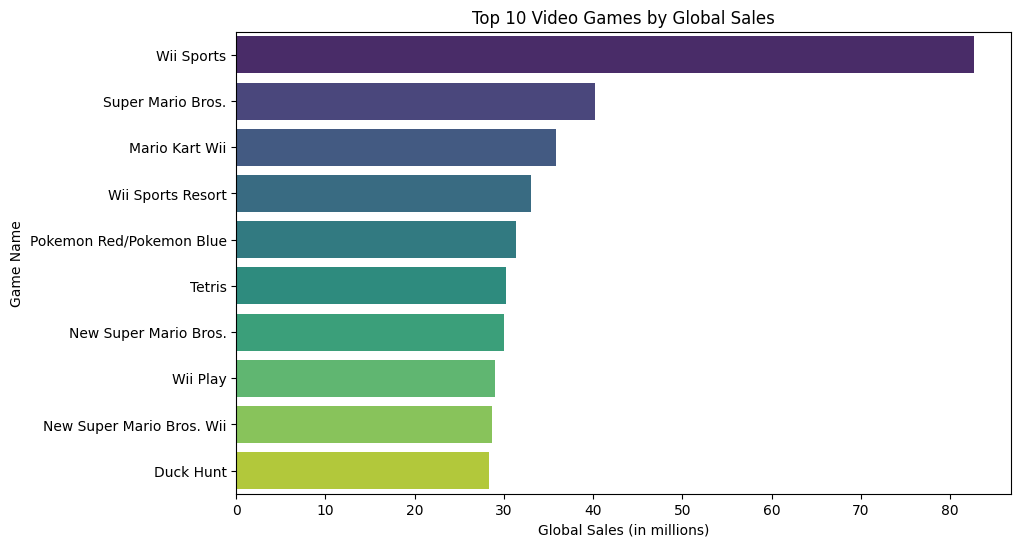

In [19]:
top_10_games = df.nlargest(10, 'Global_Sales')
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_games, palette='viridis')
plt.title('Top 10 Video Games by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()

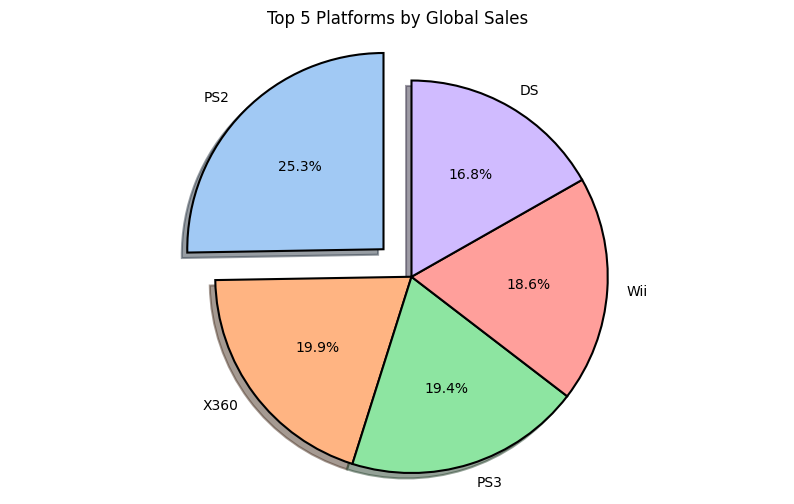

In [ ]:
plt.figure(figsize=(10, 6))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.pie(platform_sales.head(),
        labels=platform_sales.head().index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'),
        explode=(0.2, 0, 0, 0, 0),
        shadow=True,
        startangle=90,
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'black'},
        )
plt.axis('equal')
plt.title('Top 5 Platforms by Global Sales')
plt.show()

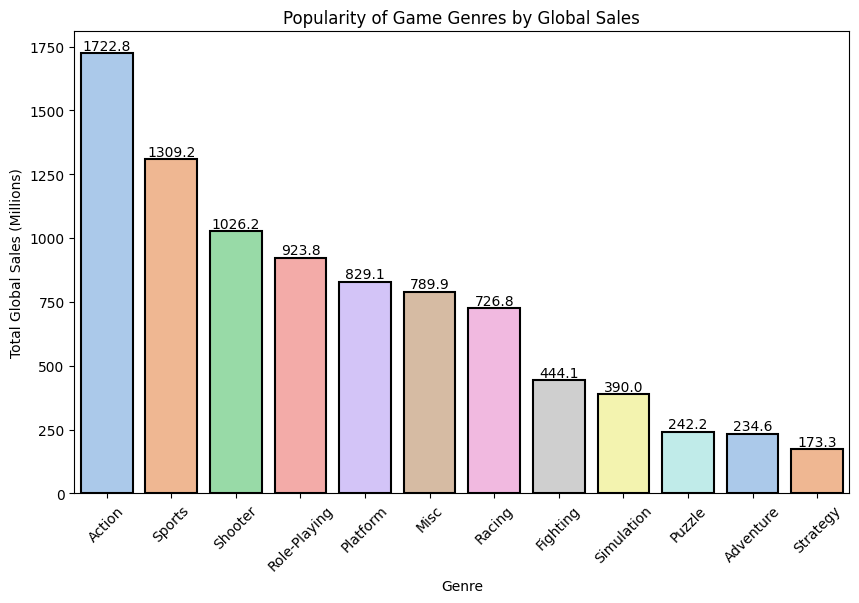

In [31]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales_df = genre_sales.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_sales, palette = 'pastel', edgecolor = 'black', linewidth = 1.5)
for i, row in genre_sales_df.iterrows():
    plt.text(i, row['Global_Sales'] + 0.5, f'{row["Global_Sales"]:.1f}', ha='center', va='bottom')

plt.title('Popularity of Game Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation = 45)
plt.show()

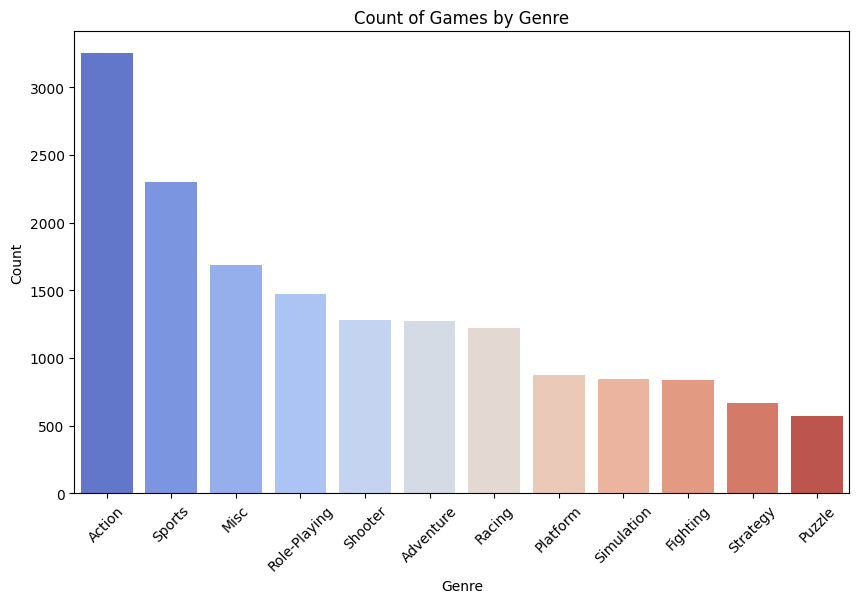

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = 'Genre', order=df['Genre'].value_counts().index, palette = 'coolwarm')
plt.title('Count of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

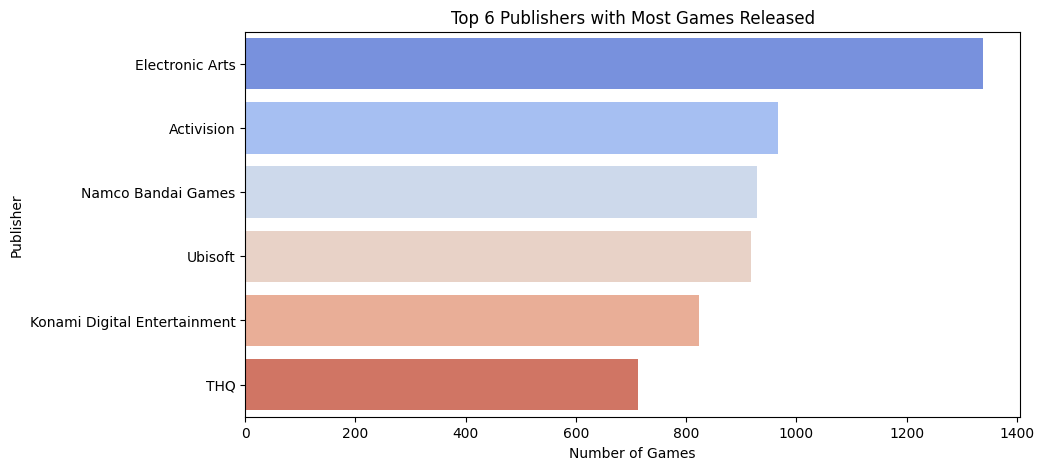

In [38]:
top_publishers = df['Publisher'].value_counts().head(6)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette = 'coolwarm')
plt.title('Top 6 Publishers with Most Games Released')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

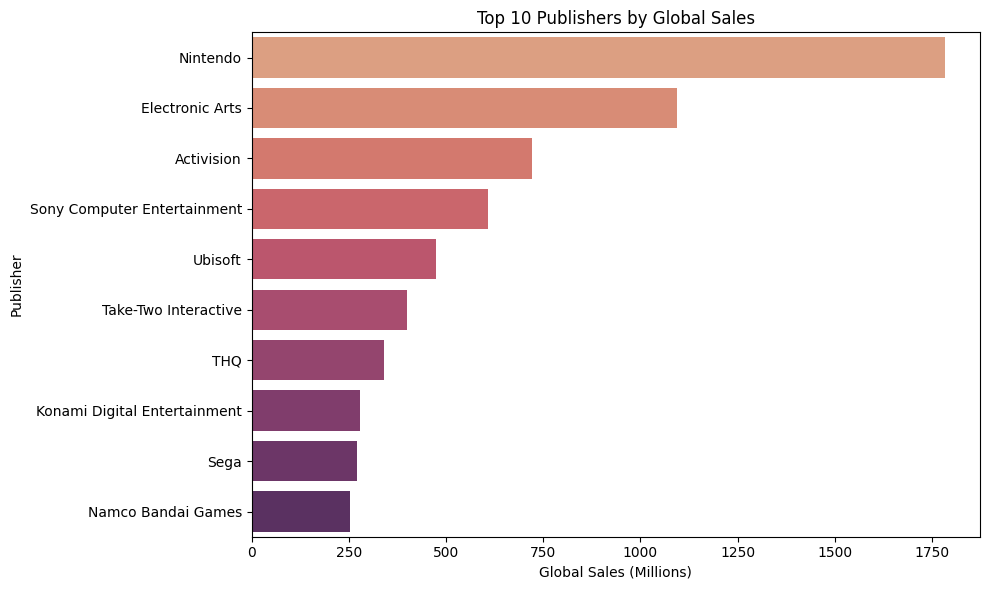

In [39]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y = top_publishers.index, palette='flare')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

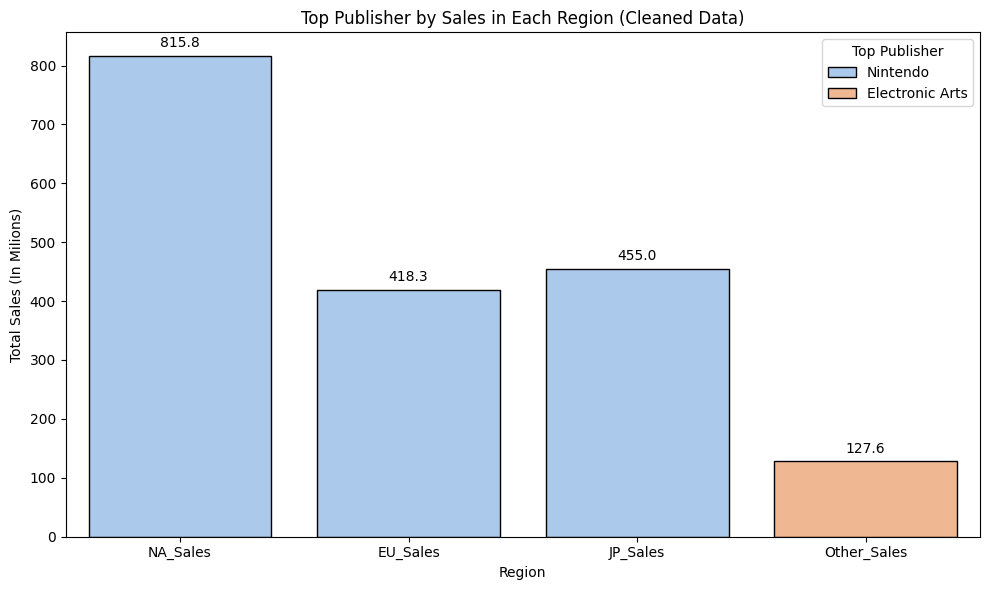

In [ ]:
#ToDo You have to read this code again!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

region_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
top_publishers_cleaned = {}
for region in region_columns:
    top_publisher = df.groupby('Publisher')[region].sum().sort_values(ascending=False).head(1)
    top_publishers_cleaned[region] = top_publisher
    top_publishers_df_cleaned = pd.DataFrame({
        'Region': list(top_publishers_cleaned.keys()),
        'Top Publisher': [p.idxmax() for p in top_publishers_cleaned.values()],
        'Sales (In Millions)': [p.max() for p in top_publishers_cleaned.values()]
    })

plt.figure(figsize=(10, 6))
sns.barplot(
    x = "Region",
    y = "Sales (In Millions)",
    hue="Top Publisher",
    data=top_publishers_df_cleaned,
    palette="pastel",
    edgecolor="black"
)

for i, row in top_publishers_df_cleaned.iterrows():
    plt.text(i, row["Sales (In Millions)"] + 10, f'{row["Sales (In Millions)"]:.1f}', ha ='center', va = "bottom", fontsize=10)

plt.title("Top Publisher by Sales in Each Region (Cleaned Data)")
plt.ylabel("Total Sales (In Milions)")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

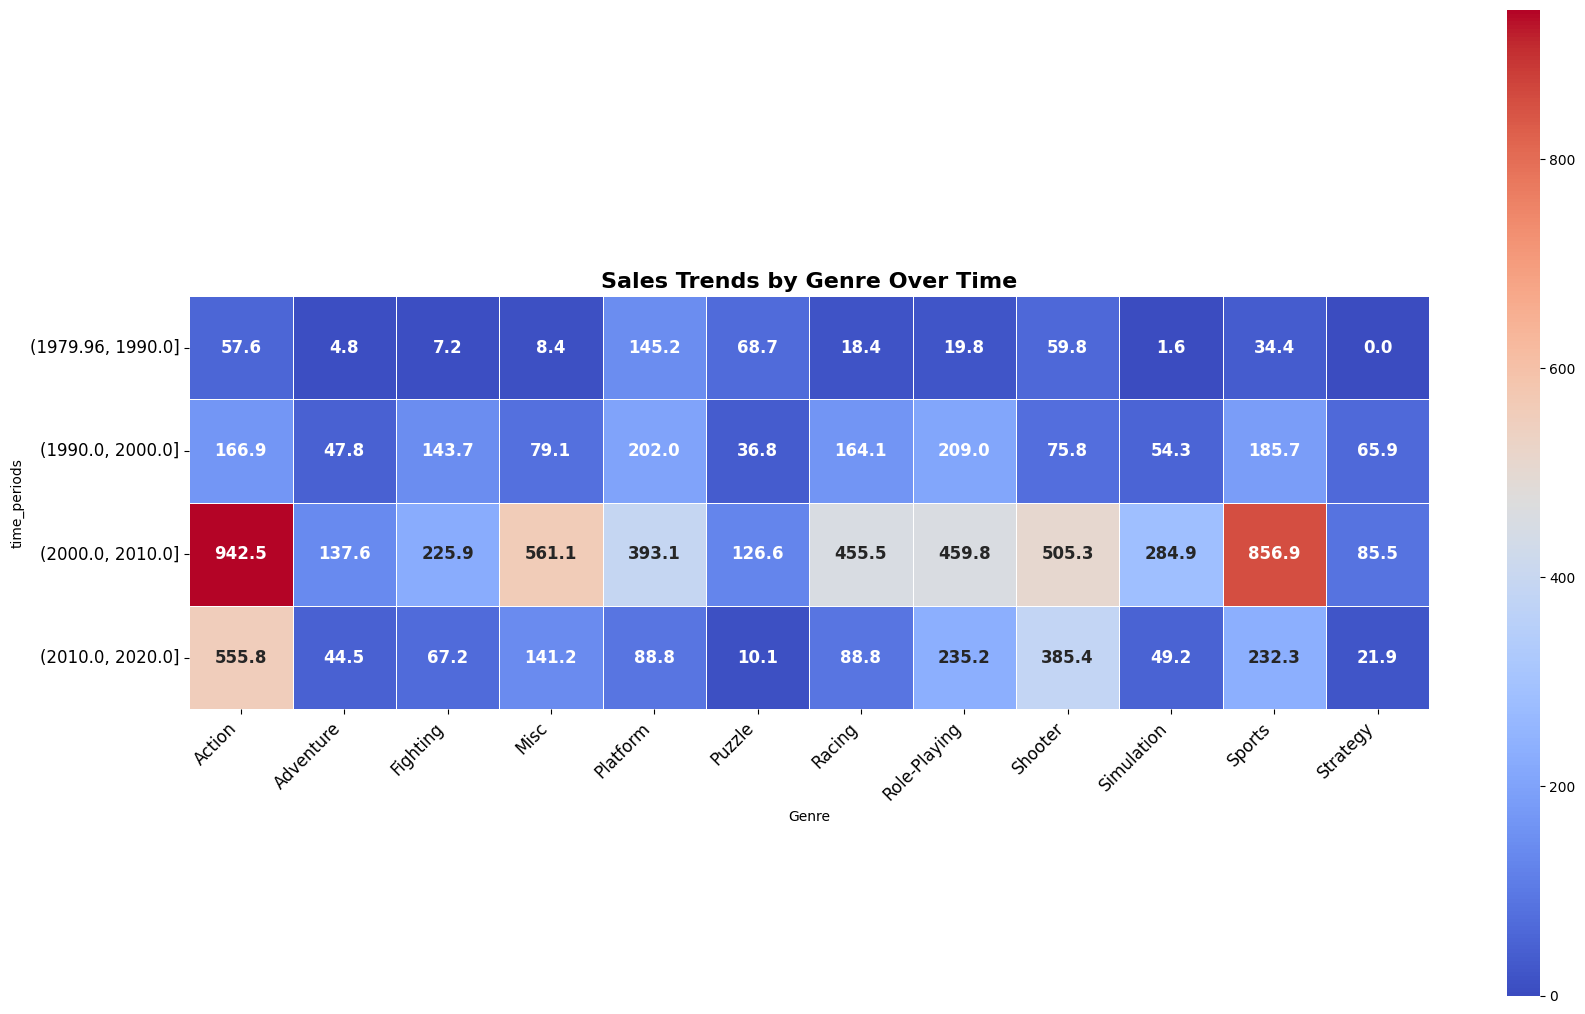

In [42]:
df['time_periods'] = pd.cut(df.Year, bins=4)

# Group data by time periods and Genre, summing Global Sales
df_time_sales = df.groupby(['time_periods', 'Genre']).Global_Sales.sum().reset_index()

# Pivot the table to get Genres as columns and time periods as rows
df_time_sales = df_time_sales.pivot(
    index='time_periods',
    columns='Genre',
    values='Global_Sales'
)

# Set figure size
plt.figure(figsize=(20, 16))

# Draw heatmap
sns.heatmap(df_time_sales,
            cmap='coolwarm',
            linewidths=0.5,
            annot=True,
            fmt=".1f",
            annot_kws={"size": 12, "weight": "bold"},
            cbar_kws={'shrink': 0.8, 'aspect': 30},
            square=True)

# Customize title and ticks
plt.title("Sales Trends by Genre Over Time", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


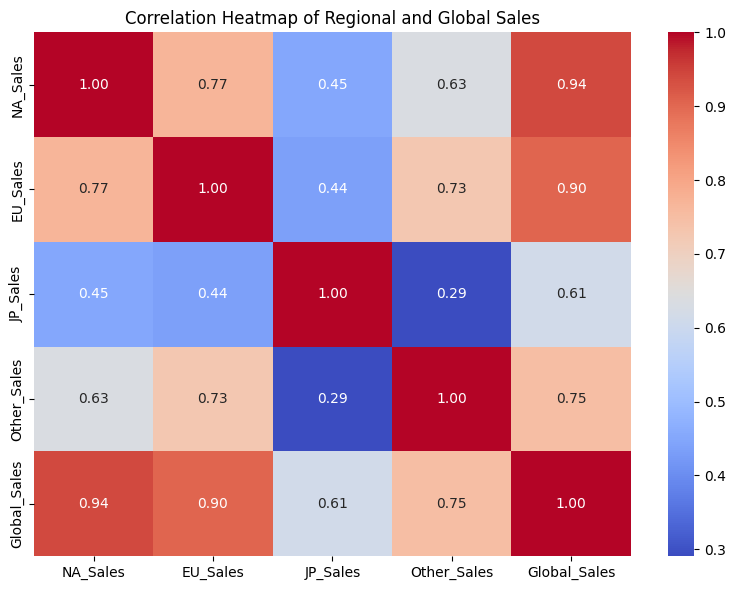

In [43]:
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title and adjust layout
plt.title('Correlation Heatmap of Regional and Global Sales')
plt.tight_layout()

# Show the plot
plt.show()

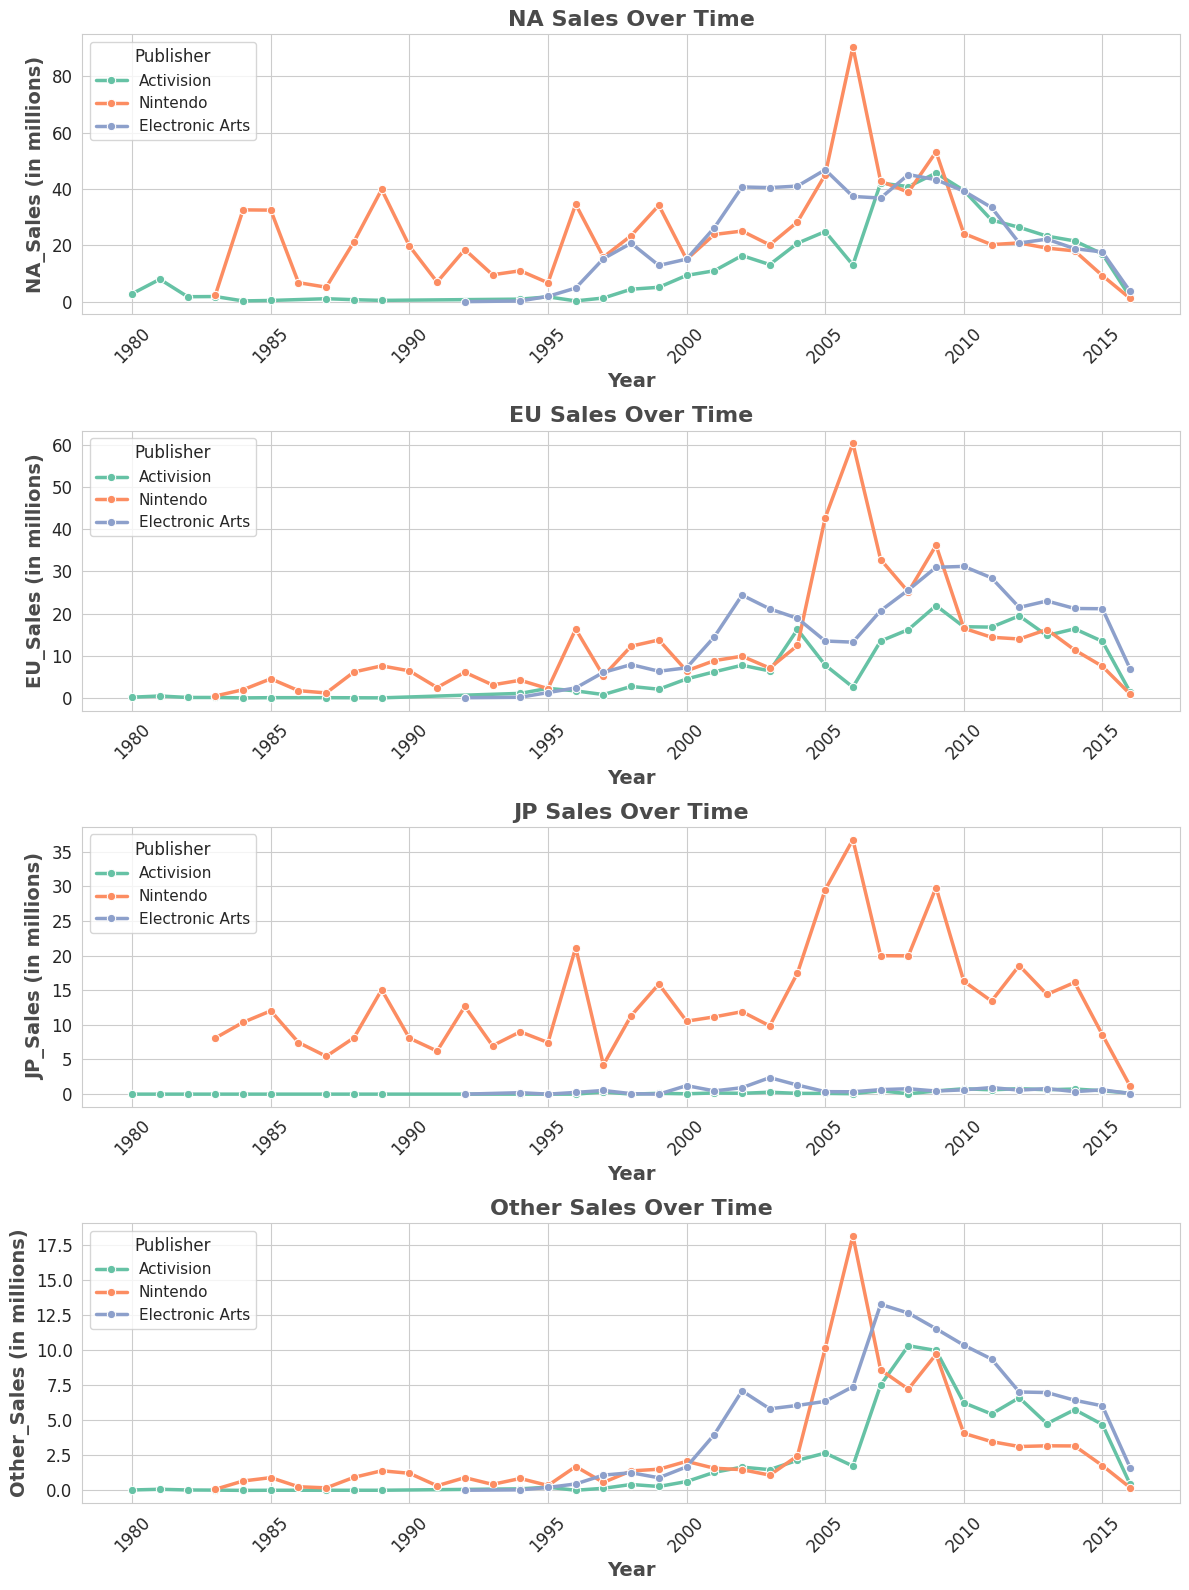

In [ ]:
succesful_publishers = df.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).index.to_list()
succesful_publishers3 = succesful_publishers[:3]

df_top3 = df[df['Publisher'].isin(succesful_publishers3)].groupby(
    ['Year', 'Publisher']
)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
titles = ["NA Sales Over Time", "EU Sales Over Time", "JP Sales Over Time", "Other Sales Over Time"]

plt.figure(figsize=(12, 16))
sns.set_style("whitegrid")

for i, (col, title) in enumerate(zip(sales_columns, titles), start=1):
    plt.subplot(4, 1, i)
    sns.lineplot(
        x='Year',
        y=col,
        data=df_top3,
        hue='Publisher',
        marker='o',
        linewidth=2.5,
        palette='Set2'
    )
    
    plt.title(title, fontsize=16, fontweight='bold', color="#4a4a4a")
    plt.xlabel("Year", fontsize=14, fontweight='bold', color="#4a4a4a")
    plt.ylabel(f"{col} (in millions)", fontsize=14, fontweight='bold', color="#4a4a4a")
    plt.legend(title="Publisher", title_fontsize=12, fontsize=11, loc='upper left', frameon=True)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


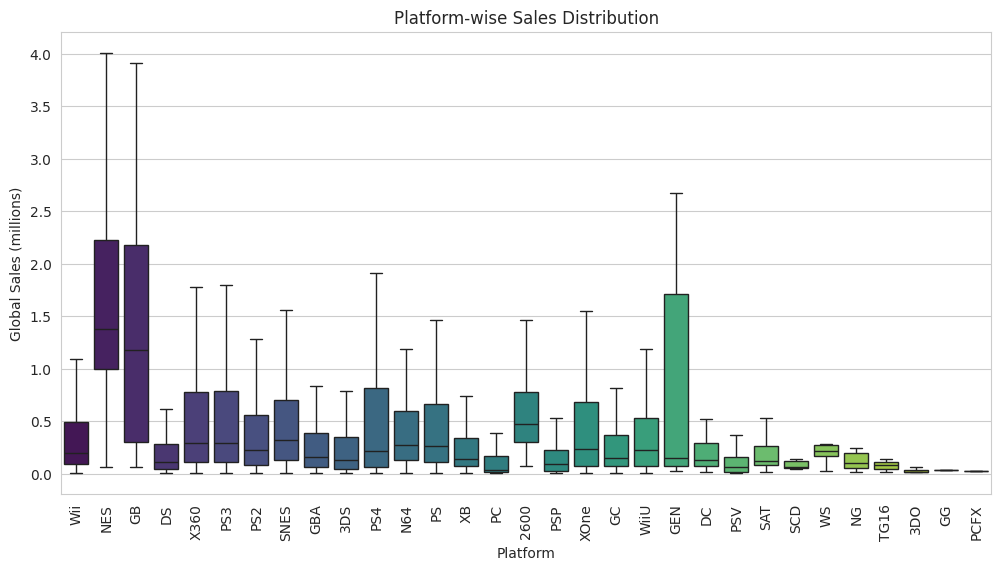

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Platform", y="Global_Sales", data=df, showfliers=False, palette='viridis')
plt.xticks(rotation=90)
plt.title("Platform-wise Sales Distribution")
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.show()
